In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback
import matplotlib.pyplot as plt

In [0]:
bs=32

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
np.random.seed(2)

In [0]:
def get_data(sz):
  data=ImageDataBunch.from_folder('/content/drive/My Drive/Wet_Dry_Classifier_Dataset',train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=sz,bs=bs).normalize(imagenet_stats)
  return data

In [9]:
learner_64= cnn_learner(get_data(64), models.resnet34, metrics=accuracy).to_fp16().mixup()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 78.5MB/s]


In [10]:
learner_64.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_64,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,1.101050,0.687837,0.740506,11:15
1,1.036610,0.629542,0.746835,01:19
2,0.935040,0.495027,0.768987,01:13
3,0.771027,0.407900,0.819620,01:14
4,0.681899,0.414893,0.822785,01:14
5,0.620394,0.412873,0.806962,01:14
6,0.579743,0.409220,0.800633,01:13
7,0.554307,0.386442,0.829114,01:14
8,0.524836,0.397471,0.832278,01:15


Better model found at epoch 0 with accuracy value: 0.7405063509941101.
Better model found at epoch 1 with accuracy value: 0.746835470199585.
Better model found at epoch 2 with accuracy value: 0.7689873576164246.
Better model found at epoch 3 with accuracy value: 0.8196202516555786.
Better model found at epoch 4 with accuracy value: 0.8227847814559937.
Better model found at epoch 7 with accuracy value: 0.8291139006614685.
Better model found at epoch 8 with accuracy value: 0.8322784900665283.


In [0]:
learner_128= cnn_learner(get_data(128), models.resnet34, metrics=accuracy).to_fp16().mixup()

In [15]:
learner_128.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (1265 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
dry,dry,dry,dry,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Valid: LabelList (316 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
wet,dry,dry,wet,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Batch

In [16]:
learner_128.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_128,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.510157,0.289433,0.889241,01:19
1,0.484217,0.347090,0.851266,01:19
2,0.506099,0.313862,0.873418,01:19
3,0.481367,0.278743,0.886076,01:19
4,0.475726,0.263219,0.882911,01:19
5,0.465243,0.263024,0.895570,01:21
6,0.443877,0.251246,0.892405,01:20
7,0.432463,0.264672,0.901899,01:21
8,0.405761,0.257549,0.898734,01:21


Better model found at epoch 0 with accuracy value: 0.8892405033111572.
Better model found at epoch 5 with accuracy value: 0.8955696225166321.
Better model found at epoch 7 with accuracy value: 0.9018987417221069.


In [0]:
learner_224= cnn_learner(get_data(224), models.resnet34, metrics=accuracy).to_fp16().mixup()

In [18]:
learner_224.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (1265 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dry,dry,dry,dry,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Valid: LabelList (316 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dry,dry,dry,wet,wet
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Batch

In [19]:
learner_224.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_224,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.431079,0.215040,0.920886,01:31
1,0.412520,0.190064,0.933544,01:32
2,0.413668,0.212805,0.908228,01:32
3,0.414579,0.192792,0.927215,01:30
4,0.411814,0.189052,0.930380,01:30
5,0.402799,0.178310,0.933544,01:30
6,0.385045,0.173334,0.933544,01:31
7,0.369277,0.178678,0.939873,01:30
8,0.361241,0.180692,0.936709,01:32


Better model found at epoch 0 with accuracy value: 0.9208860993385315.
Better model found at epoch 1 with accuracy value: 0.9335442781448364.
Better model found at epoch 7 with accuracy value: 0.9398733973503113.


In [0]:
learner_256= cnn_learner(get_data(256), models.resnet34, metrics=accuracy).to_fp16().mixup()

In [21]:
learner_256.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (1265 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
dry,dry,dry,dry,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Valid: LabelList (316 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
wet,wet,wet,wet,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Batch

In [22]:
learner_256.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_256,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.367984,0.149124,0.936709,01:36
1,0.375594,0.170828,0.933544,01:38
2,0.386659,0.178911,0.920886,01:37
3,0.384692,0.179891,0.936709,01:37
4,0.382533,0.147593,0.943038,01:37
5,0.370756,0.153829,0.939873,01:37
6,0.344934,0.151984,0.943038,01:38
7,0.343813,0.150740,0.936709,01:37
8,0.347223,0.151683,0.936709,01:38


Better model found at epoch 0 with accuracy value: 0.9367088675498962.
Better model found at epoch 4 with accuracy value: 0.9430379867553711.


In [23]:
interp = ClassificationInterpretation.from_learner(learner_256)

losses,idxs = interp.top_losses()

len(get_data(256).valid_ds)==len(losses)==len(idxs)

True

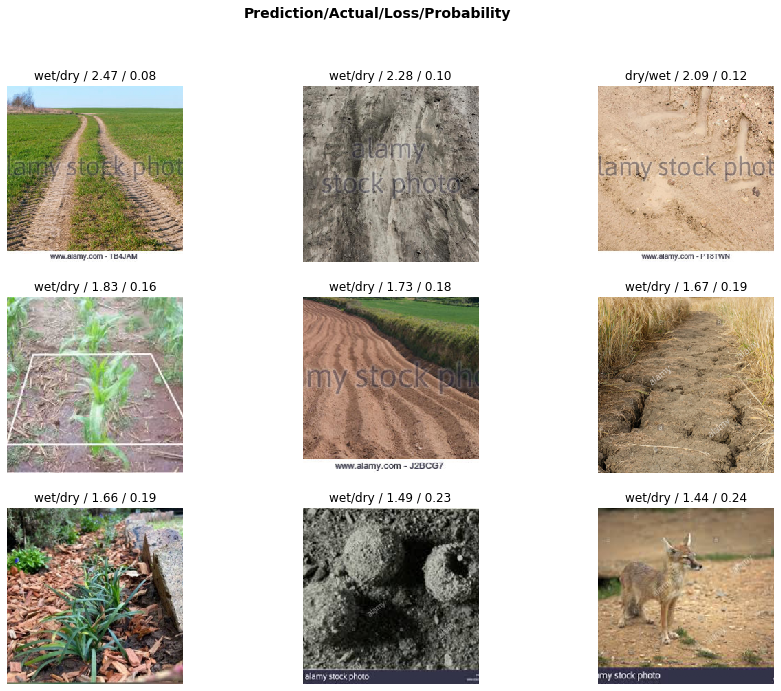

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

In [25]:
doc(interp.plot_top_losses)

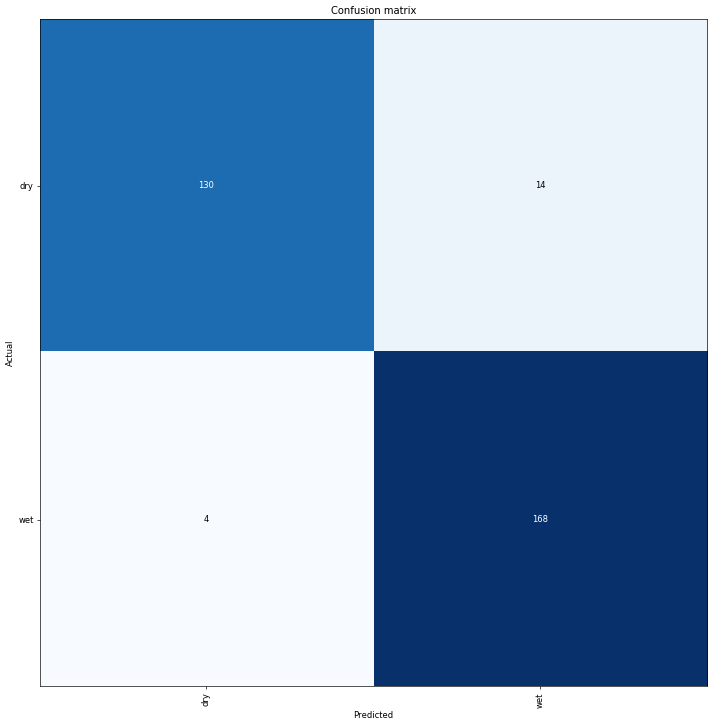

In [26]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)